# Информация о датасете
Этот набор данных содержит медицинскую информацию о 2149 пациентах, каждый из которых уникально идентифицирован с помощью идентификаторов в диапазоне от 4751 до 6900. Набор данных включает демографические данные, факторы образа жизни, историю болезни, клинические измерения, когнитивные и функциональные оценки, симптомы и диагноз болезни Альцгеймера.

* **PatientID**: Уникальный идентификатор, присвоенный каждому пациенту (от 4751 до 6900).
* **Age**: Возраст пациентов от 60 до 90 лет.
* **Gender**: гендер пациента.
* **Ethnicity**: этническая принадлежность.
* **EducationLevel**: уровень образования.
* **BMI**: индекс массы тела.
* **Smoking**: курящий или нет.
* **AlcoholConsumption**: Еженедельное потребление алкоголя в единицах измерения.
* **PhysicalActivity**: Еженедельная физическая активность в часах, от 0 до 10.
* **DietQuality**: Оценка качества от 0 до 10 баллов.
* **SleepQuality**: Оценка качества сна от 4 до 10 баллов.
* F**amilyHistoryAlzheimers**: Семейный анамнез болезни Альцгеймера, где 0 означает "Нет", а 1 - "Да".
* **CardiovascularDisease**: Наличие сердечно-сосудистых заболеваний, где 0 означает "Нет", а 1 - "Да".
* **Diabetes**: Наличие сахарного диабета, где 0 означает "Нет", а 1 - "Да".
* **Depression**: Наличие депрессии, где 0 означает "Нет", а 1 - "Да".
* **HeadInjury**: Травма головы в анамнезе, где 0 означает "Нет", а 1 - "Да".
* **Hypertension**: Наличие артериальной гипертензии, где 0 означает "Нет", а 1 - "Да".
* **SystolicBP**: Систолическое артериальное давление в диапазоне от 90 до 180 мм рт.ст.
* **DiastolicBP**: Диастолическое артериальное давление в диапазоне от 60 до 120 мм рт.ст.
* **CholesterolTotal**: Уровень общего холестерина колеблется от 150 до 300 мг/дл.
* **CholesterolLDL**: Уровень холестерина липопротеидов низкой плотности колеблется от 50 до 200 мг/дл.
* **CholesterolHDL**: Уровень холестерина липопротеидов высокой плотности колеблется от 20 до 100 мг/дл.
* **CholesterolTriglycerides**: Уровень триглицеридов колеблется от 50 до 400 мг/дл.
* **MMSE**: Оценка за мини-тест на психическое состояние варьируется от 0 до 30 баллов. Более низкие баллы указывают на когнитивные нарушения.
* **FunctionalAssessment**: Балл функциональной оценки варьируется от 0 до 10. Более низкие баллы указывают на более серьезные нарушения.
* **MemoryComplaints**: Наличие проблем с памятью, где 0 означает "Нет", а 1 - "Да".
* **BehavioralProblems**: Наличие проблем с поведением, где 0 означает "Нет", а 1 - "Да".
* **ADL**: Оценка повседневной деятельности варьируется от 0 до 10 баллов. Более низкие оценки указывают на более серьезные нарушения.
* **Confusion**: Наличие путаницы, где 0 означает "Нет", а 1 - "Да".
* **Disorientation**: Наличие дезориентации, где 0 означает "Нет", а 1 - "Да".
* **PersonalityChanges**: Наличие личностных изменений, где 0 означает "Нет", а 1 - "Да".
* **DifficultyCompletingTasks**: Наличие трудностей при выполнении заданий, где 0 означает "Нет", а 1 - "Да".
* **Forgetfulness**: Наличие забывчивости, где 0 означает "Нет", а 1 - "Да".
* **Diagnosis**: Статус диагноза болезни Альцгеймера, где 0 означает "Нет", а 1 - "Да".

На основе этого датасета я буду прогнозировать наличие болезни Альцгеймера у пациента.

# Загрузка файла

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [91]:
#uploaded = files.upload()

In [92]:
data = pd.read_csv('alzheimer.csv')
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,male,caucasian,bachelors,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,male,caucasian,none,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,male,other,high_school,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,female,caucasian,high_school,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,male,caucasian,none,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# Обработка данных

In [93]:
# удалим ненужный признак
data.drop(columns=['DoctorInCharge'], inplace=True)

In [94]:
data['Ethnicity'] = data['Ethnicity'].replace({"caucasian": 0, "african_american": 1, "asian": 2, "other": 3})
data['EducationLevel'] = data['EducationLevel'].replace({"none": 0, "high_school": 1, "bachelors": 2, "higher": 3})
data['Gender'] = data['Gender'].replace({"male": 0, "female": 1})
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


# Основные статические характеристики:

In [95]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Среднее

In [96]:
data.mean()

,0
PatientID,5825.000000
Age,74.908795
Gender,0.506282
Ethnicity,0.697534
EducationLevel,1.286645
BMI,27.655697
Smoking,0.288506
AlcoholConsumption,10.039442
PhysicalActivity,4.920202
DietQuality,4.993138


# Стандартное отклонение (разброс) данных

In [97]:
data.std()

,0
PatientID,620.507185
Age,8.990221
Gender,0.500077
Ethnicity,0.996128
EducationLevel,0.904527
BMI,7.217438
Smoking,0.453173
AlcoholConsumption,5.757910
PhysicalActivity,2.857191
DietQuality,2.909055


# Гистограммы признаков

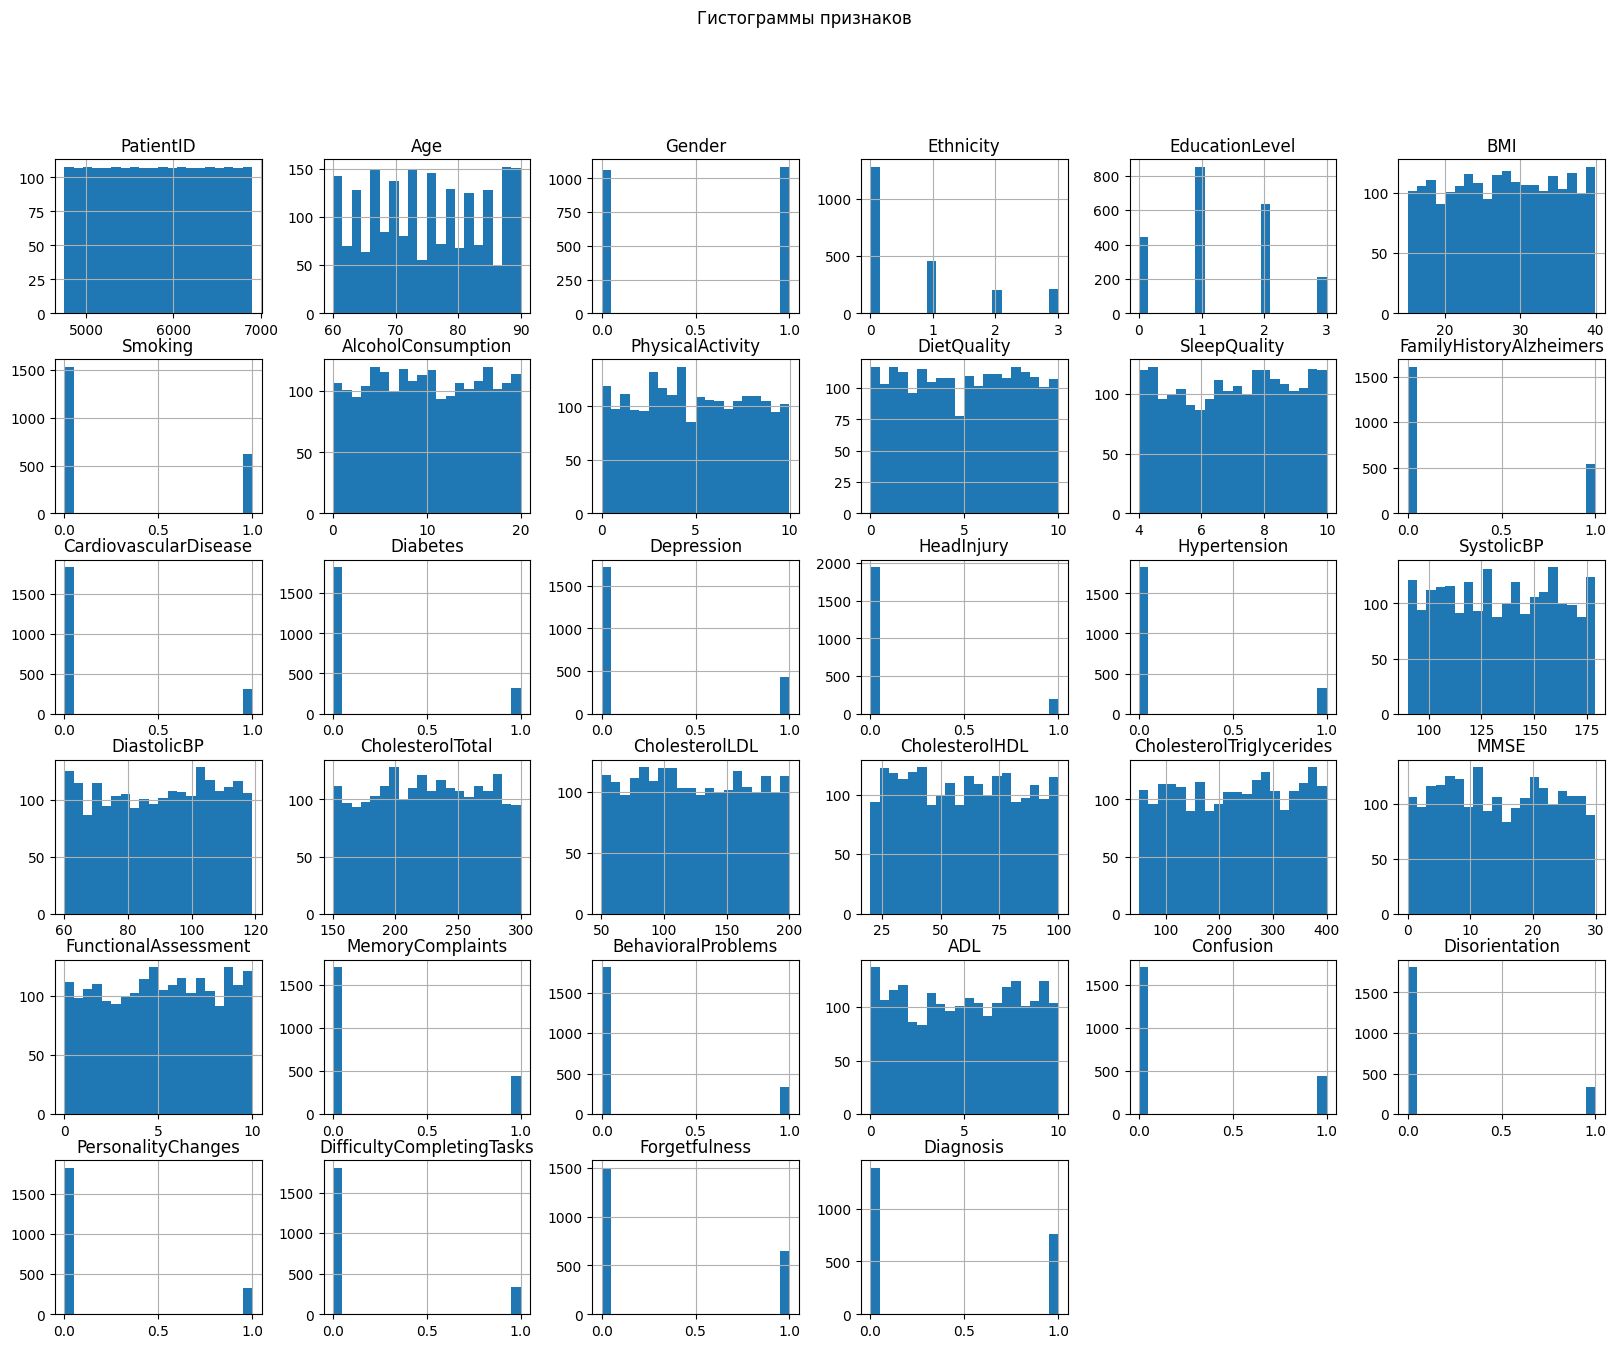

In [98]:
data.hist(bins=20, figsize=(20, 15))
plt.suptitle("Гистограммы признаков")
plt.show()

# Корреляционная матрица

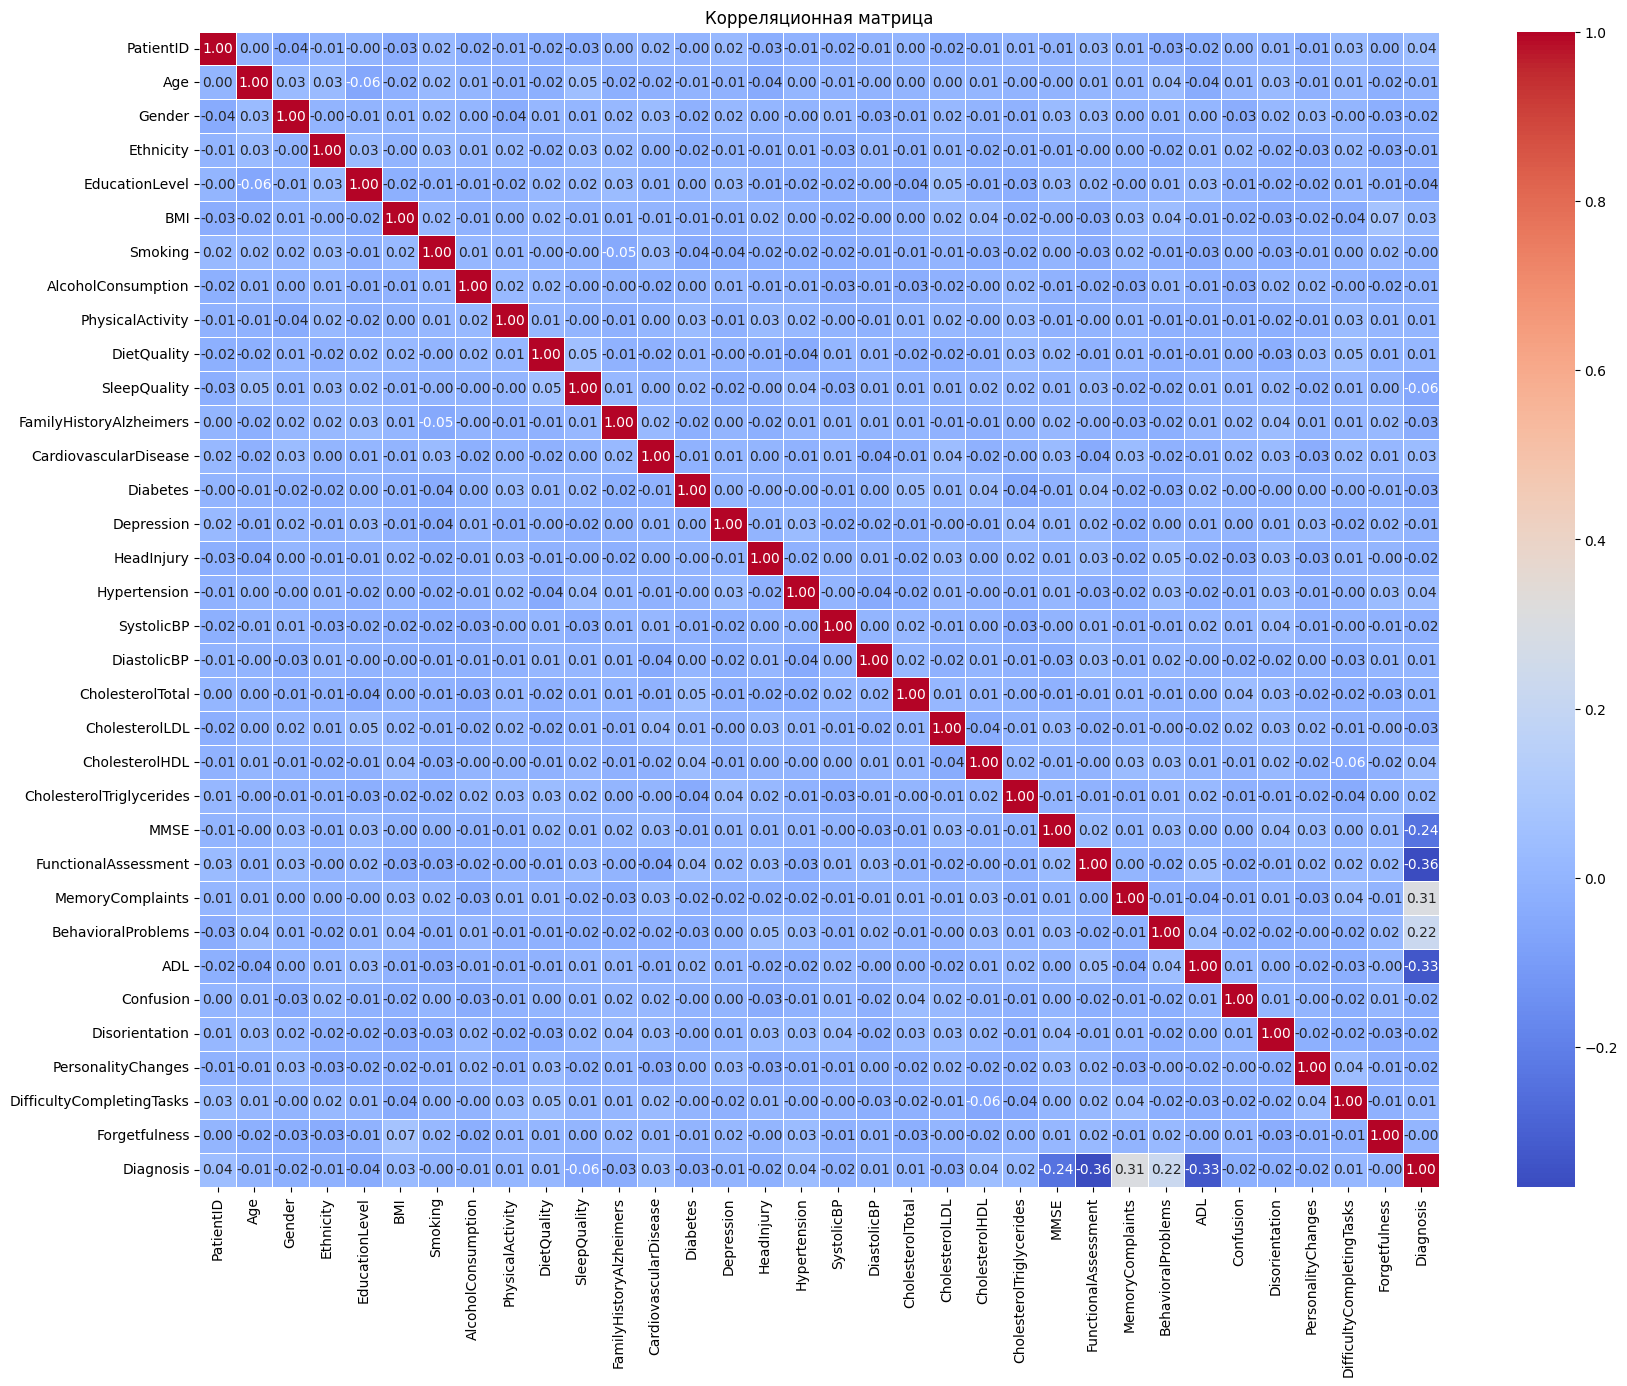

In [99]:
plt.figure(figsize=(20, 15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

# Нормализация количественных признаков

In [100]:
# нормализация числовых данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))
# преобразование обратно в DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.select_dtypes(include=[np.number]).columns)

# проверка нормализованных данных
data_scaled.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,...,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03,2.149000e+03
mean,-5.290220e-17,5.819243e-16,-1.620130e-16,3.306388e-18,1.157236e-16,3.967665e-16,-1.653194e-18,-3.637027e-17,-6.447456e-17,-2.124354e-16,...,8.596608e-17,1.901173e-17,3.471707e-17,2.314471e-17,-1.983833e-17,-1.653194e-18,1.107640e-16,-8.596608e-17,1.058044e-16,-3.471707e-17
std,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,...,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00,1.000233e+00
min,-1.731245e+00,-1.658721e+00,-1.012644e+00,-7.004083e-01,-1.422782e+00,-1.752670e+00,-6.367839e-01,-1.743649e+00,-1.721177e+00,-1.713585e+00,...,-1.756387e+00,-5.124765e-01,-4.312567e-01,-1.689224e+00,-5.081306e-01,-4.335310e-01,-4.213481e-01,-4.342881e-01,-6.570481e-01,-7.397001e-01
25%,-8.656225e-01,-8.799155e-01,-1.012644e+00,-7.004083e-01,-3.169742e-01,-8.376512e-01,-6.367839e-01,-8.511373e-01,-8.225290e-01,-8.715108e-01,...,-8.691953e-01,-5.124765e-01,-4.312567e-01,-8.952333e-01,-5.081306e-01,-4.335310e-01,-4.213481e-01,-4.342881e-01,-6.570481e-01,-7.397001e-01
50%,0.000000e+00,1.014730e-02,9.875140e-01,-7.004083e-01,-3.169742e-01,2.331380e-02,-6.367839e-01,-1.824512e-02,-5.383387e-02,2.852085e-02,...,4.973516e-03,-5.124765e-01,-4.312567e-01,1.899378e-02,-5.081306e-01,-4.335310e-01,-4.213481e-01,-4.342881e-01,-6.570481e-01,-7.397001e-01
75%,8.656225e-01,9.002101e-01,9.875140e-01,3.037127e-01,7.888335e-01,8.611819e-01,1.570391e+00,8.891560e-01,8.778833e-01,8.821022e-01,...,8.529967e-01,-5.124765e-01,-4.312567e-01,8.811305e-01,-5.081306e-01,-4.335310e-01,-4.213481e-01,-4.342881e-01,1.521959e+00,1.351899e+00
max,1.731245e+00,1.679015e+00,9.875140e-01,2.311955e+00,1.894641e+00,1.709740e+00,1.570391e+00,1.728434e+00,1.773912e+00,1.720962e+00,...,1.699963e+00,1.951309e+00,2.318805e+00,1.701132e+00,1.967998e+00,2.306640e+00,2.373334e+00,2.302619e+00,1.521959e+00,1.351899e+00


# Разделение данных на обучающую и тестовую выборки

In [101]:
# диагноз - целевая переменная
X = data_scaled.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# (80% на обучение, 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (1719, 33)
Размер тестовой выборки: (430, 33)


# Запуск классификатора KNN


Точность модели K-ближайших соседей при n = 1: 0.6721
Точность модели K-ближайших соседей при n = 2: 0.6837
Точность модели K-ближайших соседей при n = 3: 0.7023
Точность модели K-ближайших соседей при n = 4: 0.7047
Точность модели K-ближайших соседей при n = 5: 0.7256
Точность модели K-ближайших соседей при n = 6: 0.7233
Точность модели K-ближайших соседей при n = 7: 0.7326
Точность модели K-ближайших соседей при n = 8: 0.7140
Точность модели K-ближайших соседей при n = 9: 0.7372
Точность модели K-ближайших соседей при n = 10: 0.7233
Точность модели K-ближайших соседей при n = 11: 0.7488
Точность модели K-ближайших соседей при n = 12: 0.7372
Точность модели K-ближайших соседей при n = 13: 0.7581
Точность модели K-ближайших соседей при n = 14: 0.7558
Точность модели K-ближайших соседей при n = 15: 0.7628
Точность модели K-ближайших соседей при n = 16: 0.7558
Точность модели K-ближайших соседей при n = 17: 0.7721
Точность модели K-ближайших соседей при n = 18: 0.7651
Точность модели K-б

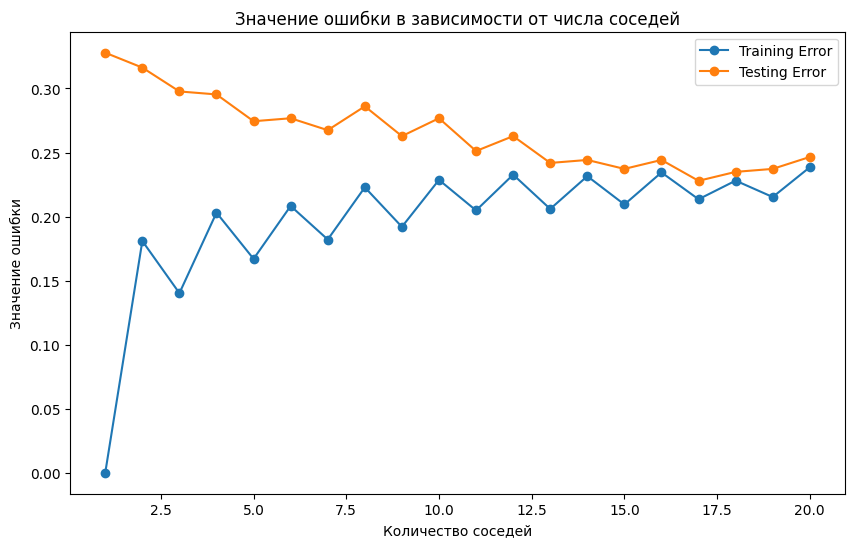

Оптимальное значение для количества соседей: 17


In [102]:
neighbor_range = range(1, 21)
train_errors = []
test_errors = []

for n in neighbor_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    # Предсказания на обучающей и тестовой выборках
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Вычисление ошибок
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность модели K-ближайших соседей при n = {n}: {accuracy:.4f}")


# Построение графиков ошибок
plt.figure(figsize=(10, 6))
plt.plot(neighbor_range, train_errors, label="Training Error", marker='o')
plt.plot(neighbor_range, test_errors, label="Testing Error", marker='o')
plt.xlabel("Количество соседей")
plt.ylabel("Значение ошибки")
plt.title("Значение ошибки в зависимости от числа соседей")
plt.legend()
plt.show()

# Оптимальное значение n_neighbors с минимальной тестовой ошибкой
optimal_n = neighbor_range[test_errors.index(min(test_errors))]
print(f"Оптимальное значение для количества соседей: {optimal_n}")


# Запуск классификатора случайного леса

Точность случайного леса при n_estimators=10:
Обучение: 0.9959, Тестирование: 0.8791
Точность случайного леса при n_estimators=30:
Обучение: 1.0000, Тестирование: 0.9186
Точность случайного леса при n_estimators=50:
Обучение: 1.0000, Тестирование: 0.9279
Точность случайного леса при n_estimators=70:
Обучение: 1.0000, Тестирование: 0.9302
Точность случайного леса при n_estimators=90:
Обучение: 1.0000, Тестирование: 0.9233
Точность случайного леса при n_estimators=110:
Обучение: 1.0000, Тестирование: 0.9279
Точность случайного леса при n_estimators=130:
Обучение: 1.0000, Тестирование: 0.9302
Точность случайного леса при n_estimators=150:
Обучение: 1.0000, Тестирование: 0.9326
Точность случайного леса при n_estimators=170:
Обучение: 1.0000, Тестирование: 0.9349
Точность случайного леса при n_estimators=190:
Обучение: 1.0000, Тестирование: 0.9302


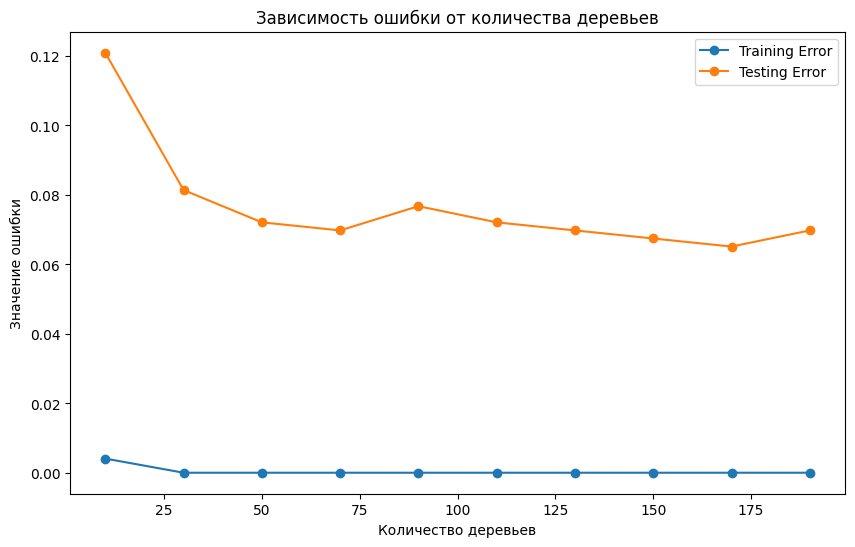

In [103]:
n_estimators_range = range(10, 210, 20)
train_errors_rf, test_errors_rf = [], []
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    # Предсказания и вычисление ошибок
    train_accuracy = accuracy_score(y_train, rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, rf.predict(X_test))
    train_errors_rf.append(1 - train_accuracy)
    test_errors_rf.append(1 - test_accuracy)

    print(f"Точность случайного леса при n_estimators={n}:")
    print(f"Обучение: {train_accuracy:.4f}, Тестирование: {test_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors_rf, label="Training Error", marker='o')
plt.plot(n_estimators_range, test_errors_rf, label="Testing Error", marker='o')
plt.xlabel("Количество деревьев")
plt.ylabel("Значение ошибки")
plt.title("Зависимость ошибки от количества деревьев")
plt.legend()
plt.show()

# Запуск классификатора метода опорных векторов

Точность метода опорных векторов при C=0.1:
Обучение: 0.7336, Тестирование: 0.7233
Точность метода опорных векторов при C=1:
Обучение: 0.9442, Тестирование: 0.8349
Точность метода опорных векторов при C=10:
Обучение: 1.0000, Тестирование: 0.8140
Точность метода опорных векторов при C=100:
Обучение: 1.0000, Тестирование: 0.8163


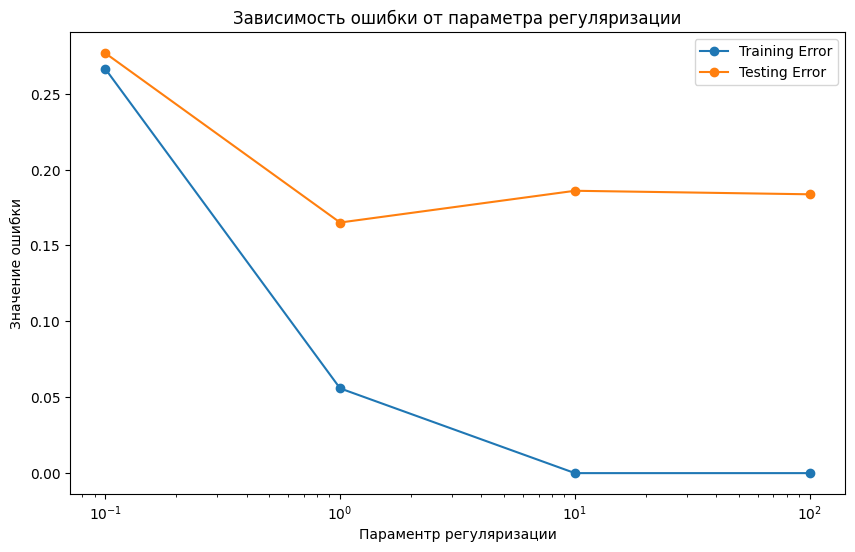

In [104]:
c_svc_range = [0.1, 1, 10, 100]
train_errors_svc, test_errors_svc = [], []
for c in c_svc_range:
    svc = SVC(C=c, kernel='rbf', random_state=42)
    svc.fit(X_train, y_train)

    # Предсказания и вычисление ошибок
    train_accuracy = accuracy_score(y_train, svc.predict(X_train))
    test_accuracy = accuracy_score(y_test, svc.predict(X_test))
    train_errors_svc.append(1 - train_accuracy)
    test_errors_svc.append(1 - test_accuracy)

    print(f"Точность метода опорных векторов при C={c}:")
    print(f"Обучение: {train_accuracy:.4f}, Тестирование: {test_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(c_svc_range, train_errors_svc, label="Training Error", marker='o')
plt.plot(c_svc_range, test_errors_svc, label="Testing Error", marker='o')
plt.xlabel("Параментр регуляризации")
plt.xscale("log")
plt.ylabel("Значение ошибки")
plt.title("Зависимость ошибки от параметра регуляризации")
plt.legend()
plt.show()

# Вывод
В ходе данной лабораторной работы были проведены несколько различных этапов. В частности, был загружен CSV файл и в последующем обработан. Были получены данные, которые были в последствии нормализованы. Помимо этого, были получены и интерпретированы основные характеристики. Далее полученные данные были разделены на обучающую и тестовую выборки. После были запущены несколько классификаторов: KNN, случайный лес и SVC.

Подводя итог, наилучшим для данного датасета оказался классификатор случайного леса. Для него максимальное значение accuracy = 0.9349, что заметно больше алгоритмов KNN и SVC, максимальные значения которых равны соответственно 0.7721 и 0.8349.

Данные результаты показали, что различные гиперпараметры методов по-разному влияют на качество работы моделей, и выбор оптимальных значений является одной из важнейших частей работы с каждым методом. Случайный лес показал стабильные результаты при разумном количестве деревьев, SVM - чувствительность к параметру C. Эти результаты позволяют использовать подходящий алгоритм в зависимости от требований к скорости обучения и обобщающей способности модели.

# Домашняя работа (продолжение)

Подчистить и исправить все, что было сделано в домашнем задании для 2 ноября. С теми же данными - решить задачу кластеризации 3 методами: KMeans, DBSCAN и любым другим на ваш выбор. В задаче обучения с учителем вы не должны использовать целевую метку y. В случае задачи классификации сравнить выход каждого алгоритма кластеризации с истинными метками. Сделать выводы.

### Кластеризация методом KMeans

Подберём гиперпараметры

In [116]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_clusters': list(range(2, 21))
}
km = KMeans()
clf = GridSearchCV(km, parameters)
clf.fit(X)
clusters_kmeans = clf.best_params_['n_clusters']
clf.best_params_

{'n_clusters': 20}

In [117]:
kmeans = KMeans(n_clusters=clusters_kmeans, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, data['KMeans_Cluster'])
print(f"Силуэтный коэффициент для KMeans: {silhouette_kmeans}")

Силуэтный коэффициент для KMeans: 0.01044234806335409


Визуализируем кластеры KMeans

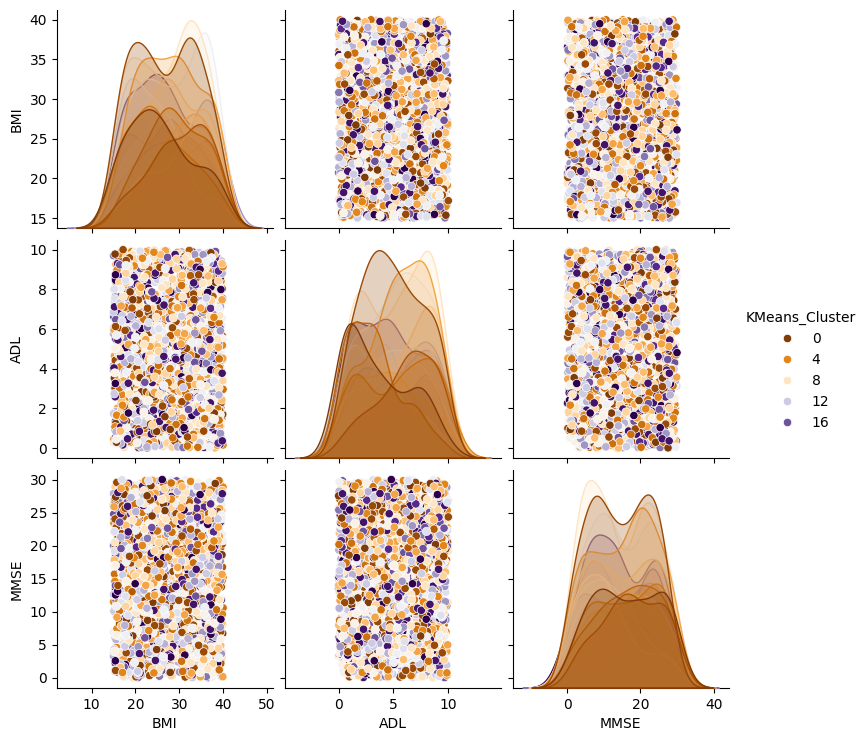

In [118]:
selected_fields = ['BMI', 'ADL', 'MMSE']
data['KMeans_Cluster'] = kmeans.labels_

sns.pairplot(data, vars=selected_fields, hue='KMeans_Cluster', palette='PuOr')
plt.show()

Визуализируем средний силуэтный коэффициент для каждого кластера

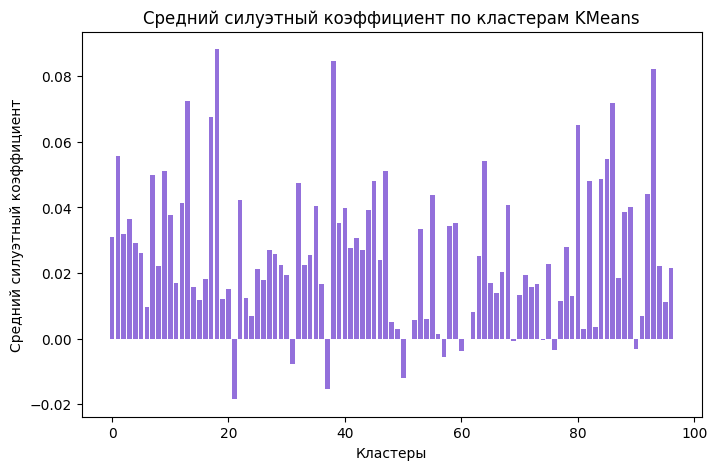

In [108]:
labels = kmeans.labels_
silhouette_vals = silhouette_samples(X, labels)

n_clusters = len(set(labels))
silhouette_means = [np.mean(silhouette_vals[labels == i]) for i in range(n_clusters)]

plt.figure(figsize=(8, 5))
plt.bar(range(n_clusters), silhouette_means, color='mediumpurple')
plt.xlabel('Кластеры')
plt.ylabel('Средний силуэтный коэффициент')
plt.title('Средний силуэтный коэффициент по кластерам KMeans')
plt.show()

Сравнение с истинными метками

In [109]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

true_labels = data['Diagnosis']

cluster_labels = data['KMeans_Cluster']

ari = adjusted_rand_score(true_labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

nmi = normalized_mutual_info_score(true_labels, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

Adjusted Rand Index (ARI): 0.002
Normalized Mutual Information (NMI): 0.035


### Кластеризация методом DBSCAN

Подберем гиперпараметры


In [127]:
from sklearn.cluster import AgglomerativeClustering
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return -1

parameters = {
    'n_clusters': list(range(2, 21))
}

agg_clustering = AgglomerativeClustering()

clf_agg = GridSearchCV(agg_clustering, parameters, scoring=make_scorer(silhouette_scorer))
clf_agg.fit(X)
clusters_agg = clf_agg.best_params_['n_clusters']
clf_agg.best_params_

{'n_clusters': 2}

In [128]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=clusters_agg)
data['Agglomerative_Cluster'] = agg_clustering.fit_predict(X)
silhouette_agg = silhouette_score(X, data['Agglomerative_Cluster'])
print(f"Силуэтный коэффициент для Agglomerative Clustering: {silhouette_agg}")

Силуэтный коэффициент для Agglomerative Clustering: 0.07627916628013573


Визуализация кластеров Agglomerative Clustering

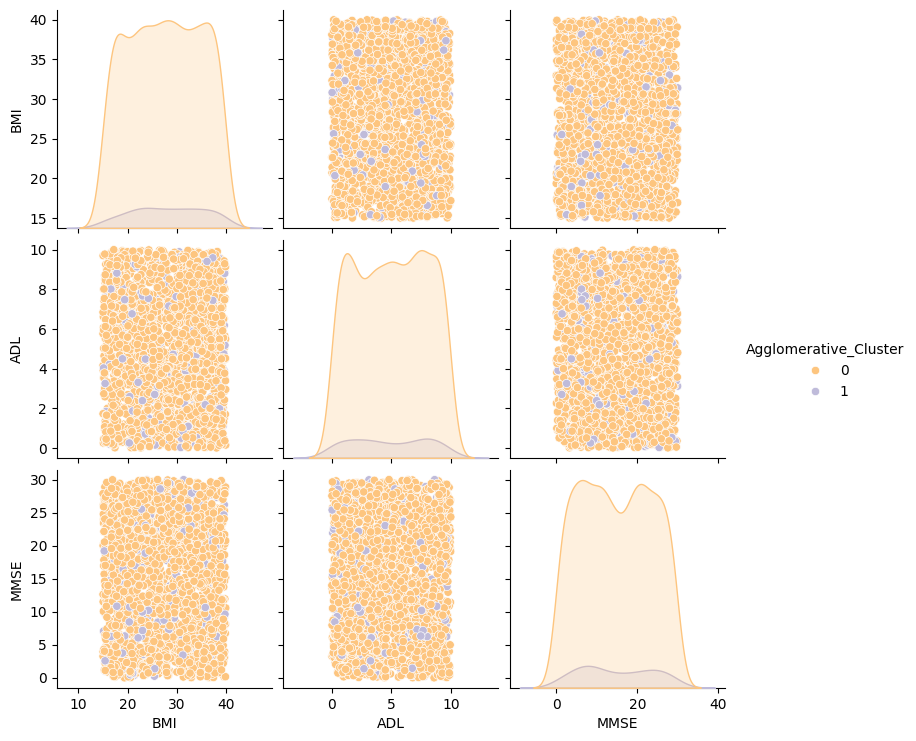

In [129]:
selected_fields = ['BMI', 'ADL', 'MMSE']
data['Agglomerative_Cluster'] = agg_clustering.labels_

sns.pairplot(data, vars=selected_fields, hue='Agglomerative_Cluster', palette='PuOr')
plt.show()

Визуализируем средний силуэтный коэффициент для каждого кластера

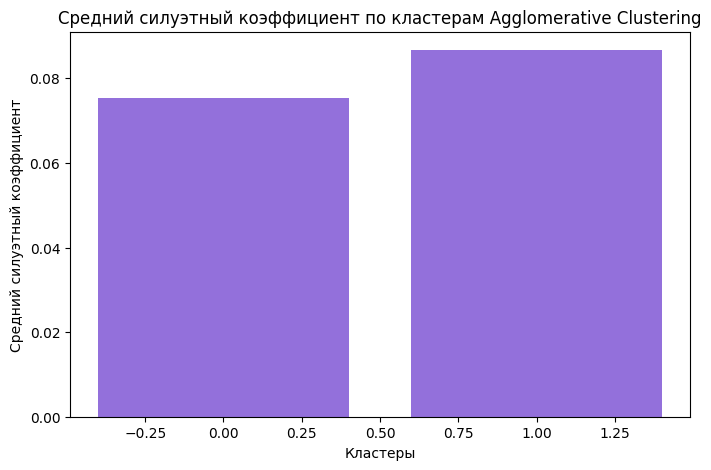

In [130]:
labels = agg_clustering.labels_
silhouette_vals = silhouette_samples(X, labels)

n_clusters = len(set(labels))
silhouette_means = [np.mean(silhouette_vals[labels == i]) for i in range(n_clusters)]

plt.figure(figsize=(8, 5))
plt.bar(range(n_clusters), silhouette_means, color='mediumpurple')
plt.xlabel('Кластеры')
plt.ylabel('Средний силуэтный коэффициент')
plt.title('Средний силуэтный коэффициент по кластерам Agglomerative Clustering')
plt.show()

Сравнение с истинными метками

In [131]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

true_labels = data['Diagnosis']

cluster_labels = data['Agglomerative_Cluster']

ari = adjusted_rand_score(true_labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

nmi = normalized_mutual_info_score(true_labels, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

Adjusted Rand Index (ARI): -0.002
Normalized Mutual Information (NMI): 0.000


### Кластеризация методом DBSCAN

In [154]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        return silhouette_score(X, labels)
    else:
        return -1

parameters = {
    'eps': [0.5, 1.0, 1.5, 2.0, 3.0],
    'min_samples': [2, 3, 5]
}

dbscan = DBSCAN()

clf_dbscan = GridSearchCV(dbscan, parameters, scoring=make_scorer(silhouette_scorer))
clf_dbscan.fit(X)

eps_dbscan = clf_dbscan.best_params_['eps']
min_samples_dbscan = clf_dbscan.best_params_['min_samples']

print(f"Лучшие параметры: {clf_dbscan.best_params_}")
print(f"Лучший силуэтный коэффициент: {clf_dbscan.best_score_}")

Лучшие параметры: {'eps': 0.5, 'min_samples': 2}
Лучший силуэтный коэффициент: nan


Как видно из полученных данных, кластеризация не удалась и данный алгоритм не подходит для данного датасета.


# Выводы
Применяя алгоритмы кластеризации я не смог эффективно выделить кластеры, потому что, возможно, классы не образуют группы, которые можно хорошо разделить. При обучении с учителем удается добиться распознования классов, а это значит, что классы выделить возможно, но этого не удалось сделать при помощи выбранных алгоритмов кластеризации.